<a href="https://colab.research.google.com/github/srv96/AI-ML-TensorFlow/blob/main/Recommender_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
!wget -nc http://files.grouplens.org/datasets/movielens/ml-20m.zip

File ‘ml-20m.zip’ already there; not retrieving.



In [3]:
!unzip -n ml-20m.zip

Archive:  ml-20m.zip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('ml-20m/ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [6]:
df = df.sort_values(by=['timestamp'], ascending=True)
df.head()

,userId,movieId,rating,timestamp
4182421,28507,1176,4.0,789652004
18950979,131160,1079,3.0,789652009
18950930,131160,21,3.0,789652009
18950936,131160,47,5.0,789652009
14452509,99851,39,5.0,822873600


In [7]:
df = df.drop(columns=['timestamp'])
df.head()

,userId,movieId,rating
4182421,28507,1176,4.0
18950979,131160,1079,3.0
18950930,131160,21,3.0
18950936,131160,47,5.0
14452509,99851,39,5.0


In [8]:
df.movieId = pd.Categorical(df.movieId)
df['new_movie_id'] = df.movieId.cat.codes
df.head()

,userId,movieId,rating,new_movie_id
4182421,28507,1176,4.0,1153
18950979,131160,1079,3.0,1057
18950930,131160,21,3.0,20
18950936,131160,47,5.0,46
14452509,99851,39,5.0,38


In [9]:
df.userId = pd.Categorical(df.userId)
df['new_user_id'] = df.userId.cat.codes
df.head()

,userId,movieId,rating,new_movie_id,new_user_id
4182421,28507,1176,4.0,1153,28506
18950979,131160,1079,3.0,1057,131159
18950930,131160,21,3.0,20,131159
18950936,131160,47,5.0,46,131159
14452509,99851,39,5.0,38,99850


In [10]:
user_ids = df['new_user_id'].values
movie_ids = df['new_movie_id'].values
ratings = df['rating'].values

In [11]:
#number of users and movies
N = len(set(user_ids))
M = len(set(movie_ids))

#embedding dimension
K = 10

In [12]:
#user input
u = tf.keras.layers.Input(shape=(1,))

#movie input
m = tf.keras.layers.Input(shape=(1,))

#Embeddings
u_emb = tf.keras.layers.Embedding(N,K)(u)
m_emb = tf.keras.layers.Embedding(M,K)(m)

#Flatten both embeddings
u_emb = tf.keras.layers.Flatten()(u_emb)
m_emb = tf.keras.layers.Flatten()(m_emb)

#Concatenate user-movie embeddings into a single feature vector
x = tf.keras.layers.Concatenate()([u_emb, m_emb])

#add a regular ANN
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[u,m] , outputs=x)
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1,momentum=0.9,nesterov=True),
)


In [13]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 10)          │      1,384,930 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 10)          │        267,440 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 10)             │              0 │ embedding[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten_1 (Flatten)       │ (None, 10)             │              0 │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 20)             │              0 │ flatten[0][0],         │
│                           │                        │                │ flatten_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1024)           │         21,504 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 1)              │          1,025 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,674,899 (6.39 MB)

 Trainable params: 1,674,899 (6.39 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
from sklearn.utils import shuffle
user_ids , movie_ids , ratings = shuffle(user_ids , movie_ids , ratings)
Ntrain = int(0.8 * len(ratings))
train_user = user_ids[:Ntrain]
train_movie = movie_ids[:Ntrain]
train_ratings = ratings[:Ntrain]

test_user = user_ids[Ntrain:]
test_movie = movie_ids[Ntrain:]
test_ratings = ratings[Ntrain:]

#center of ratings
avg_rating = train_ratings.mean()
train_ratings = train_ratings - avg_rating
test_ratings = test_ratings - avg_rating

In [19]:
def create_dataset(user, movie, ratings, batch_size=512, shuffle_buffer=None):
    dataset = tf.data.Dataset.from_tensor_slices(((user, movie), ratings))
    if shuffle_buffer and shuffle_buffer > 0:
        dataset = dataset.shuffle(buffer_size=shuffle_buffer)  # Shuffle dataset only if buffer size > 0
    dataset = dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
    return dataset

In [20]:
batch_size = 1024
train_dataset = create_dataset(train_user, train_movie, train_ratings, batch_size, shuffle_buffer=0)
test_dataset = create_dataset(test_user, test_movie, test_ratings, batch_size, shuffle_buffer=0)

In [22]:
r = model.fit(
  x=[train_user, train_movie],
  y=train_ratings,
  epochs=25,
  batch_size=1024,
  verbose=2,
  validation_data=([test_user, test_movie], test_ratings),
)

Epoch 1/25
15626/15626 - 35s - 2ms/step - loss: 0.9396 - val_loss: 0.9468
Epoch 2/25
15626/15626 - 40s - 3ms/step - loss: 0.9358 - val_loss: 0.9459
Epoch 3/25
15626/15626 - 35s - 2ms/step - loss: 0.9331 - val_loss: 0.9440
Epoch 4/25
15626/15626 - 38s - 2ms/step - loss: 0.9308 - val_loss: 0.9430
Epoch 5/25
15626/15626 - 41s - 3ms/step - loss: 0.9284 - val_loss: 0.9424
Epoch 6/25
15626/15626 - 33s - 2ms/step - loss: 0.9261 - val_loss: 0.9416
Epoch 7/25
15626/15626 - 34s - 2ms/step - loss: 0.9239 - val_loss: 0.9408
Epoch 8/25
15626/15626 - 34s - 2ms/step - loss: 0.9216 - val_loss: 0.9401
Epoch 9/25
15626/15626 - 34s - 2ms/step - loss: 0.9192 - val_loss: 0.9402
Epoch 10/25
15626/15626 - 43s - 3ms/step - loss: 0.9166 - val_loss: 0.9389
Epoch 11/25
15626/15626 - 79s - 5ms/step - loss: 0.9140 - val_loss: 0.9385
Epoch 12/25
15626/15626 - 33s - 2ms/step - loss: 0.9116 - val_loss: 0.9386
Epoch 13/25
15626/15626 - 40s - 3ms/step - loss: 0.9093 - val_loss: 0.9375
Epoch 14/25
15626/15626 - 35s - 2m

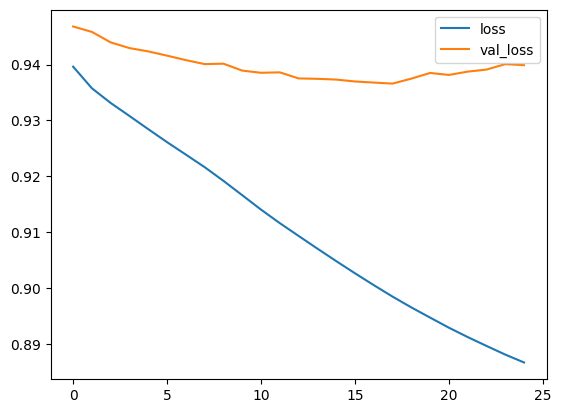

In [23]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
np.sqrt(0.9370)